In [122]:
#Mehmet Enes Gümüş 150170047
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import moviepy.editor as mpy
from matplotlib.colors import LightSource

In [123]:
y, sr = librosa.load("FNF_ost.wav", duration=10)
tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beats = librosa.frames_to_time(beats, sr=sr).round(1)
beats

array([1.2, 1.5, 1.9, 2.2, 2.5, 2.9, 3.2, 3.5, 3.9, 4.2, 4.5, 4.9])

In [124]:
beat_array=[0]*125

In [125]:
for i in range(12):
    beat_array[int((beats[i]*125)/5)]=1

In [126]:
for i in range(125):  
    beat_array[i]=beat_array[i]+0.23

0/124
1/124
2/124
3/124
4/124
5/124
6/124
7/124
8/124
9/124
10/124
11/124
12/124
13/124
14/124
15/124
16/124
17/124
18/124
19/124
20/124
21/124
22/124
23/124
24/124
25/124
26/124
27/124
28/124
29/124
30/124
31/124
32/124
33/124
34/124
35/124
36/124
37/124
38/124
39/124
40/124
41/124
42/124
43/124
44/124
45/124
46/124
47/124
48/124
49/124
50/124
51/124
52/124
53/124
54/124
55/124
56/124
57/124
58/124
59/124
60/124
61/124
62/124
63/124
64/124
65/124
66/124
67/124
68/124
69/124
70/124
71/124
72/124
73/124
74/124
75/124
76/124
77/124
78/124
79/124
80/124
81/124
82/124
83/124
84/124
85/124
86/124
87/124
88/124
89/124
90/124
91/124
92/124
93/124
94/124
95/124
96/124
97/124
98/124
99/124
100/124
101/124
102/124
103/124
104/124
105/124
106/124
107/124
108/124
109/124
110/124
111/124
112/124
113/124
114/124
115/124
116/124
117/124
118/124
119/124
120/124
121/124
122/124
123/124
Moviepy - Building video video.mp4.
Moviepy - Writing video video.mp4



Moviepy - Done !
Moviepy - video ready video.mp4


chunk:   0%|                                                                         | 0/117 [00:00<?, ?it/s, now=None]

Moviepy - Building video FNF_video.mp4.
MoviePy - Writing audio in FNF_videoTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video FNF_video.mp4



Moviepy - Done !
Moviepy - video ready FNF_video.mp4


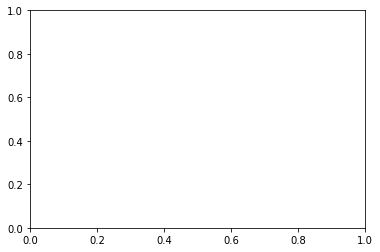

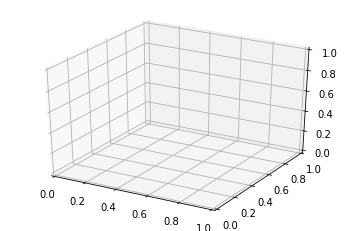

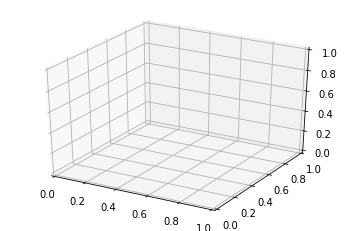

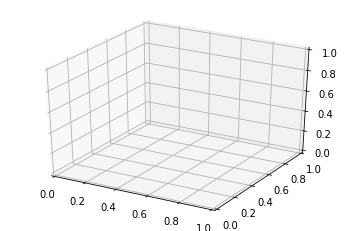

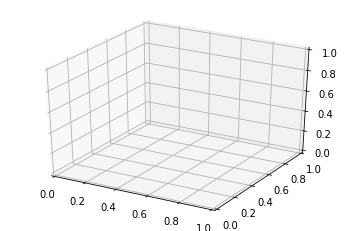

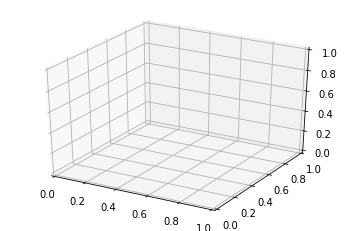

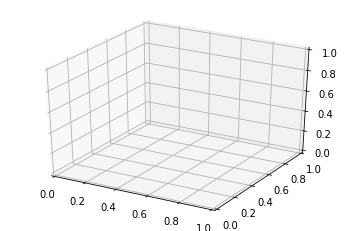

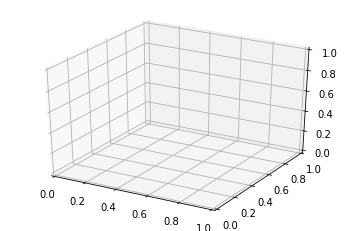

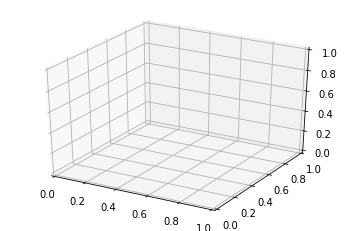

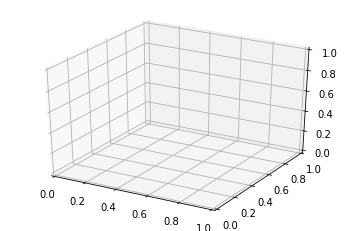

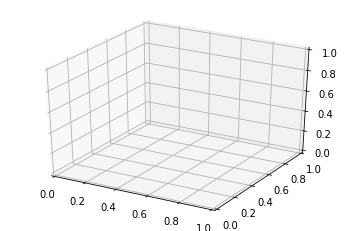

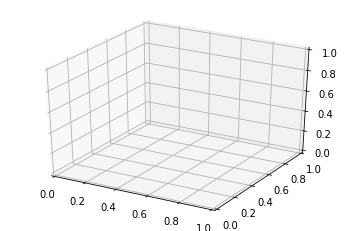

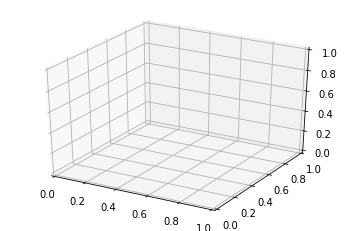

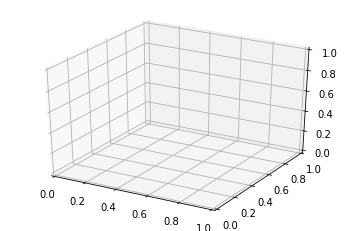

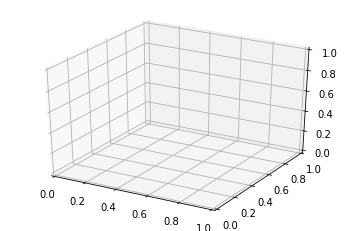

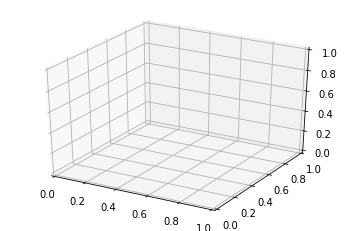

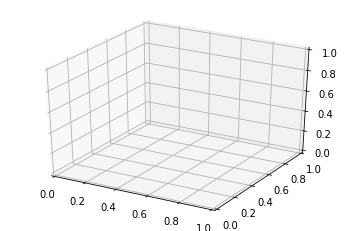

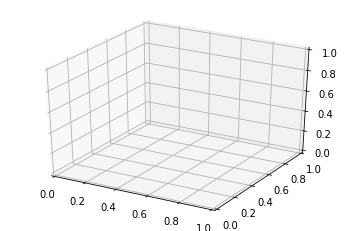

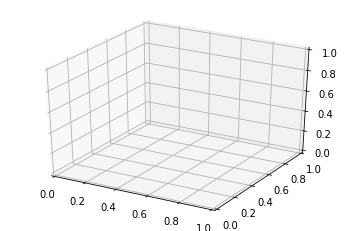

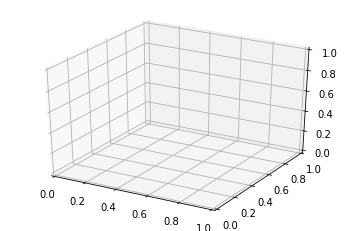

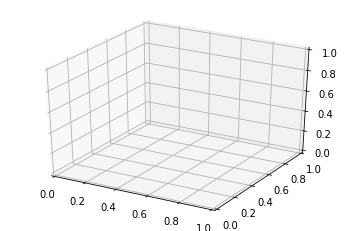

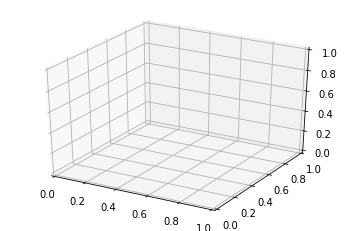

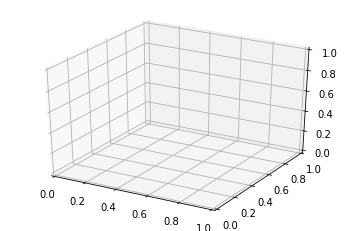

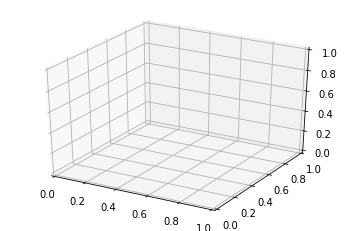

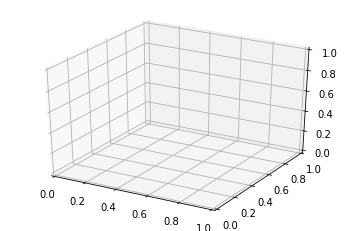

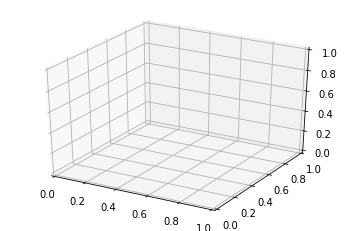

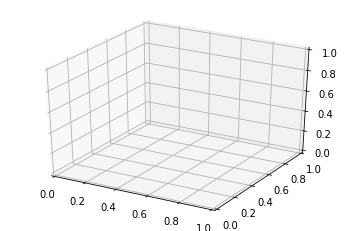

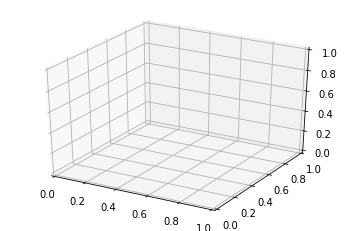

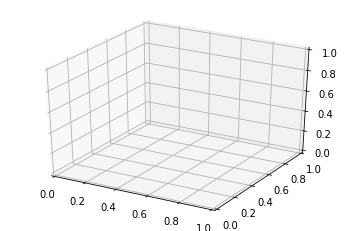

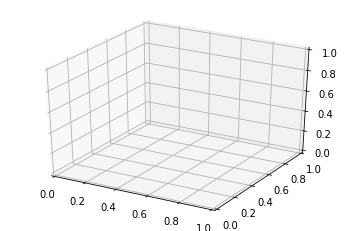

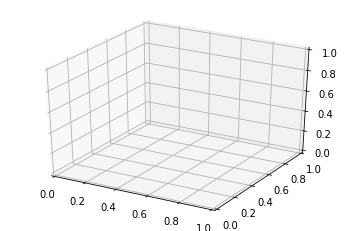

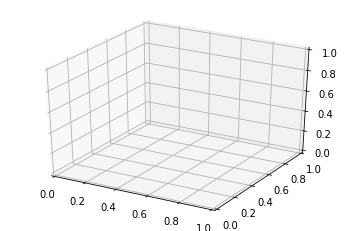

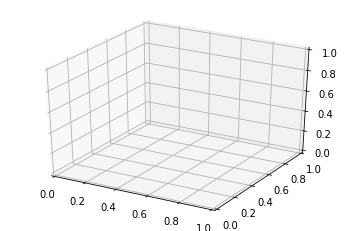

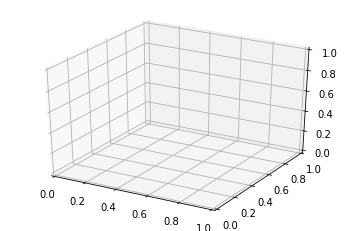

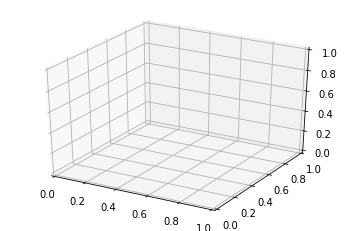

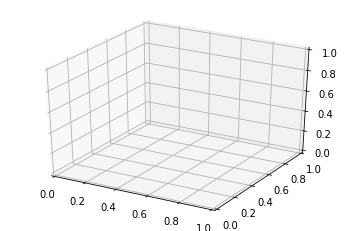

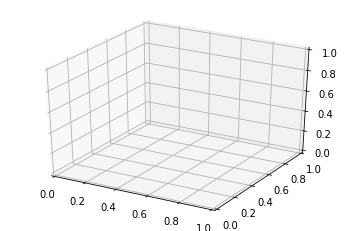

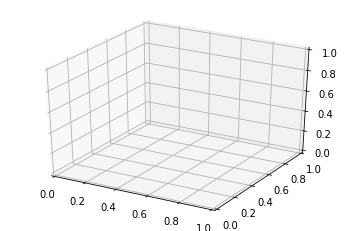

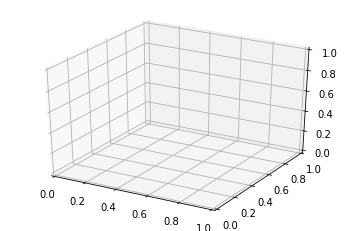

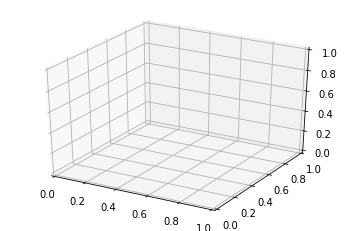

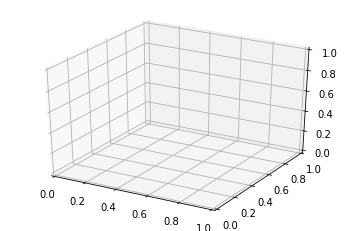

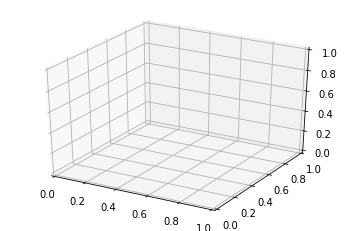

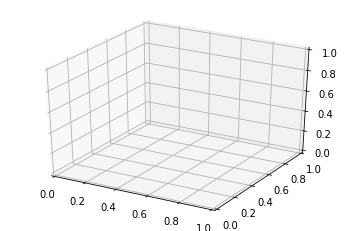

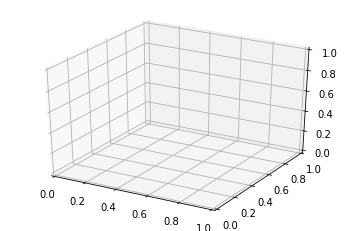

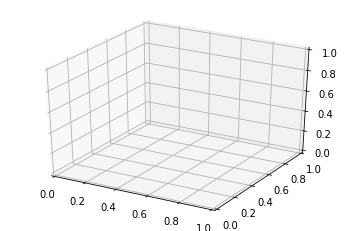

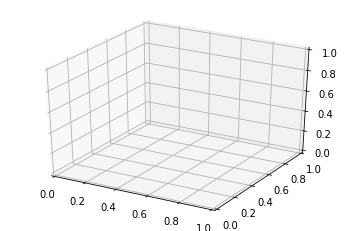

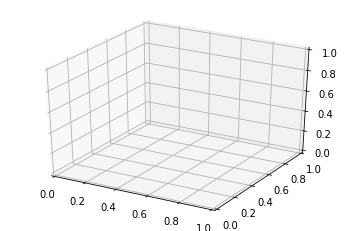

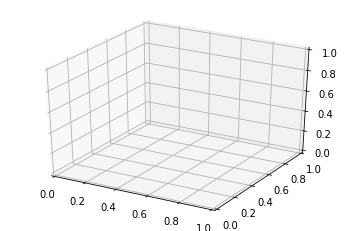

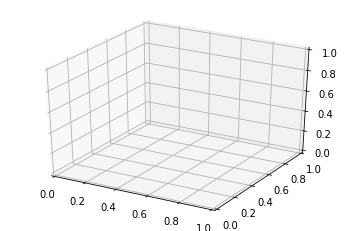

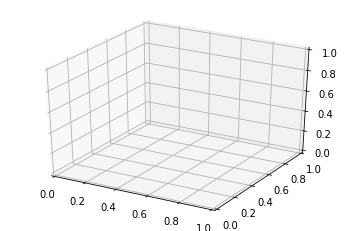

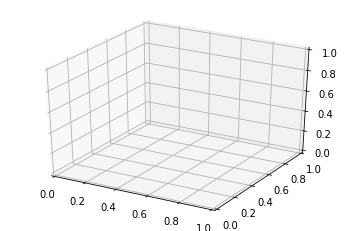

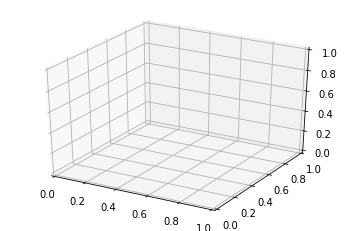

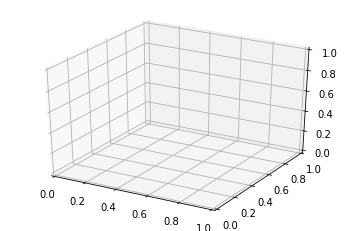

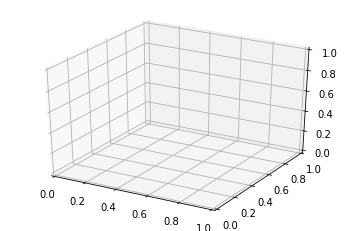

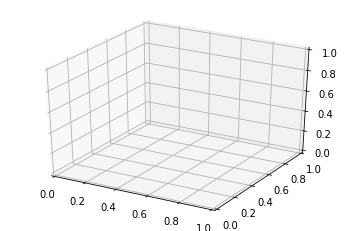

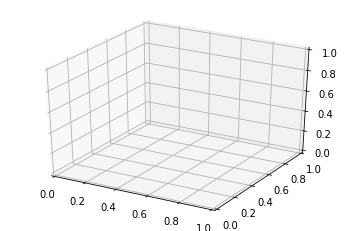

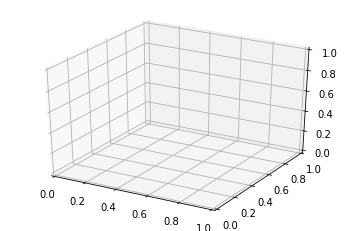

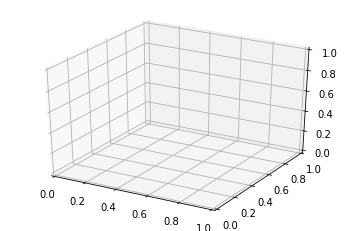

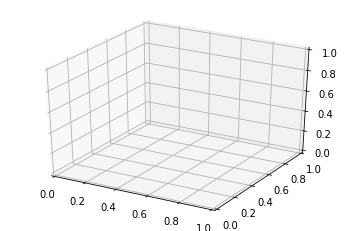

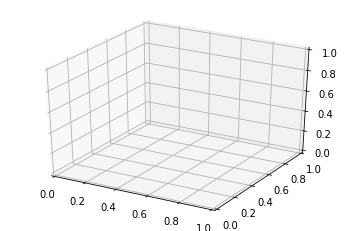

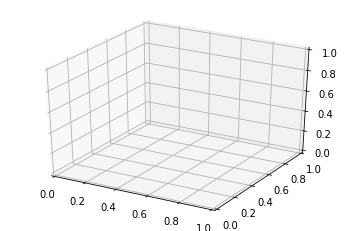

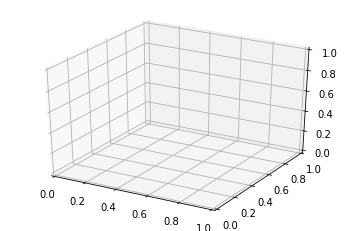

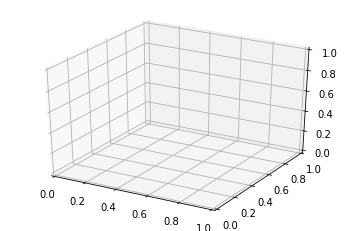

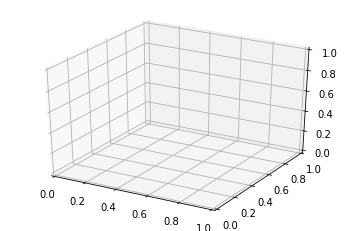

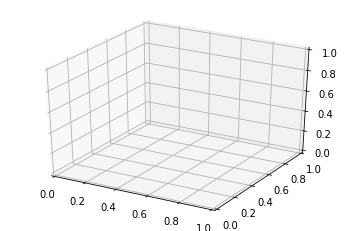

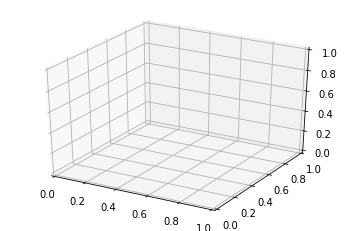

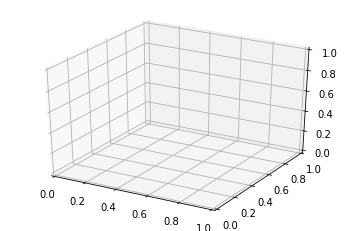

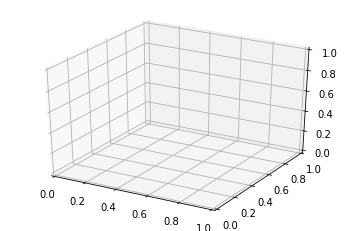

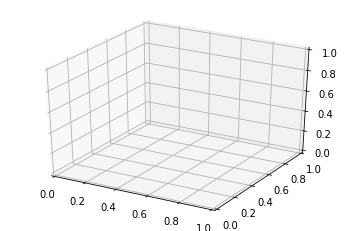

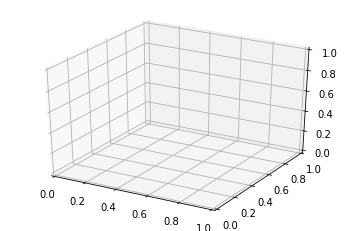

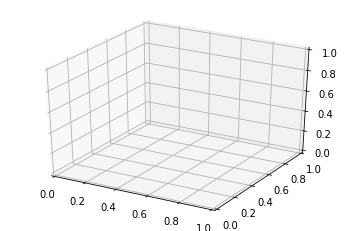

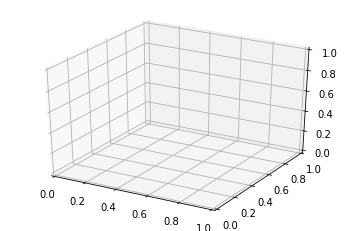

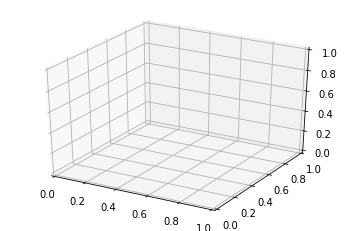

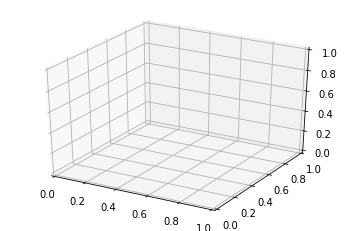

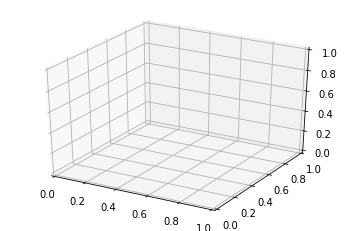

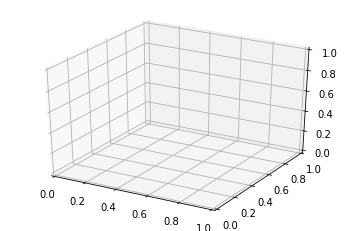

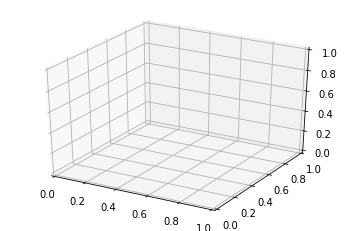

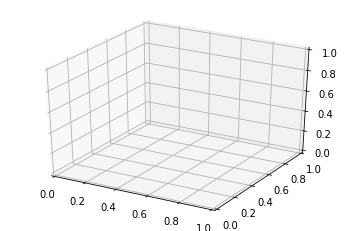

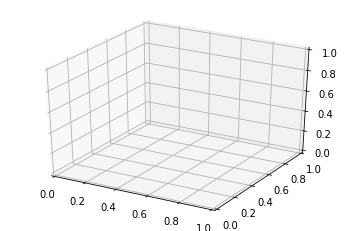

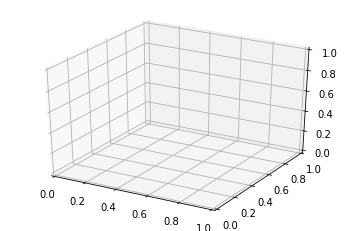

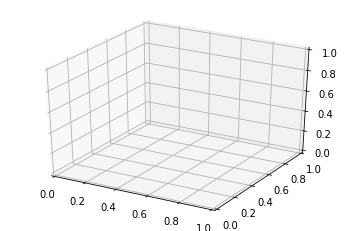

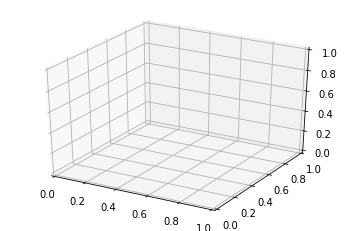

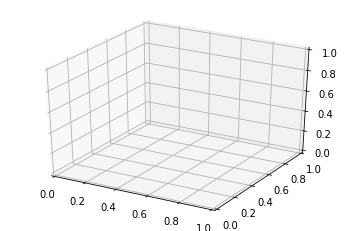

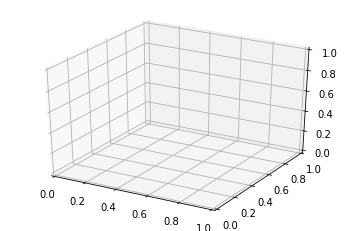

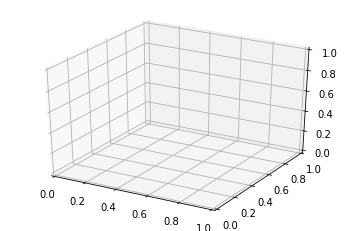

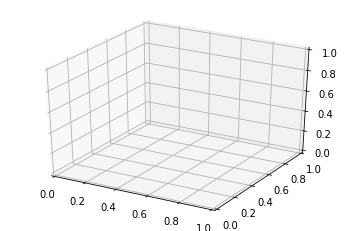

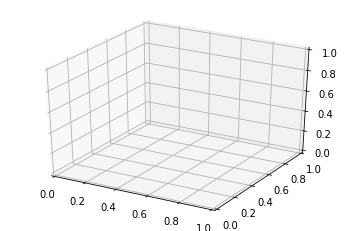

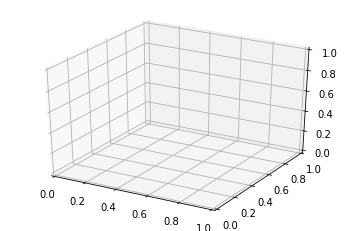

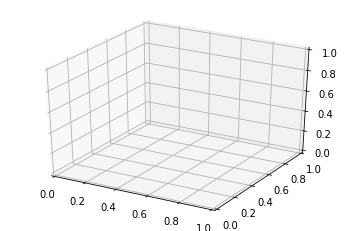

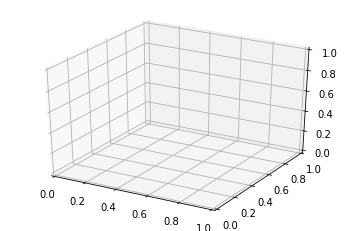

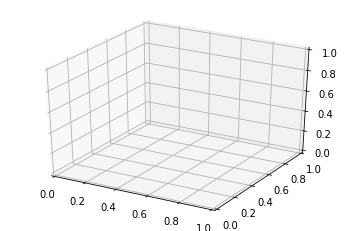

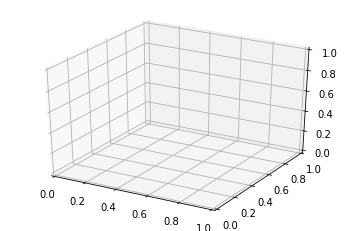

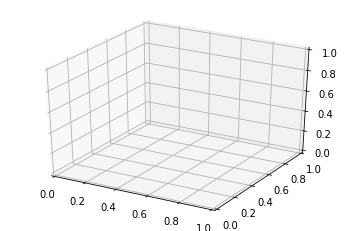

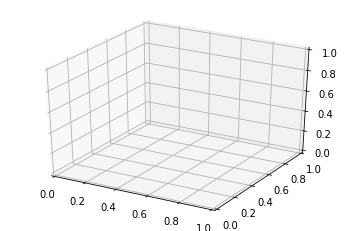

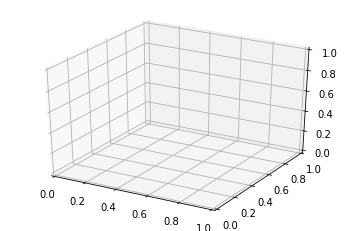

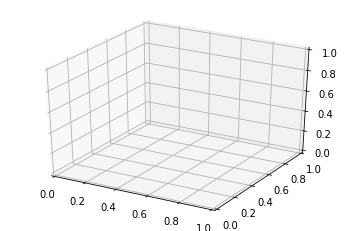

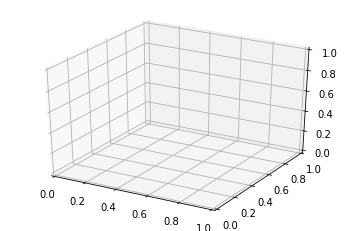

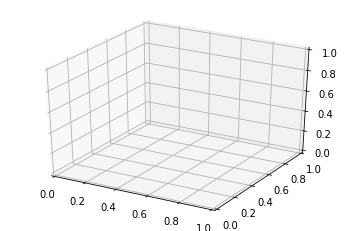

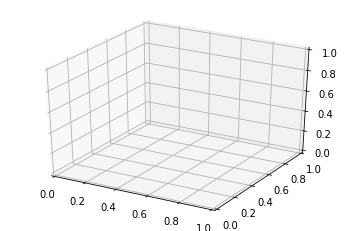

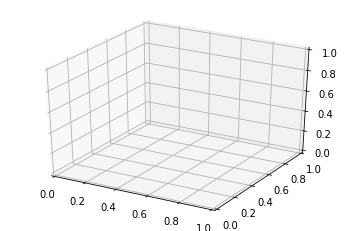

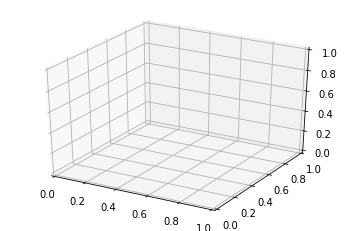

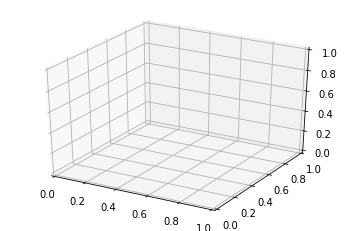

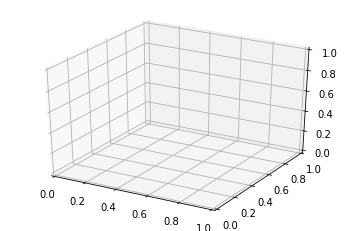

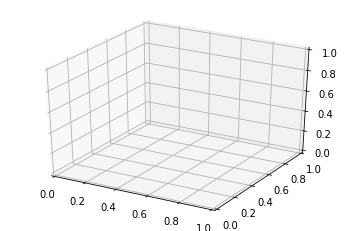

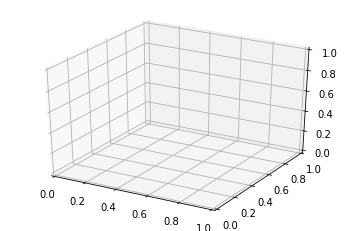

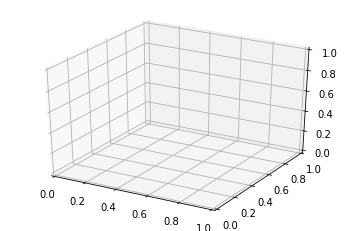

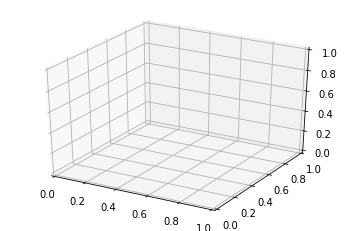

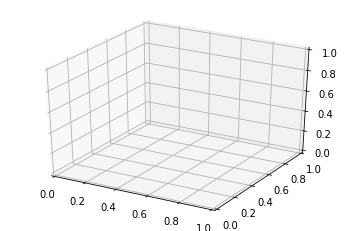

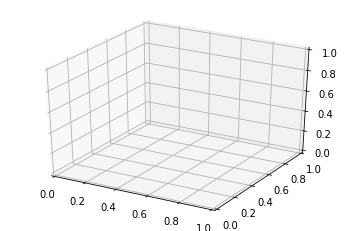

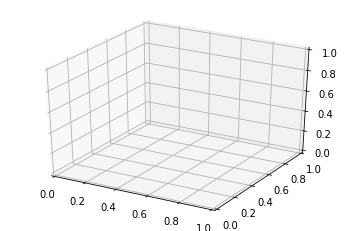

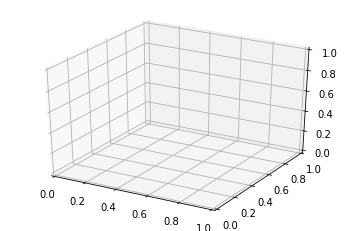

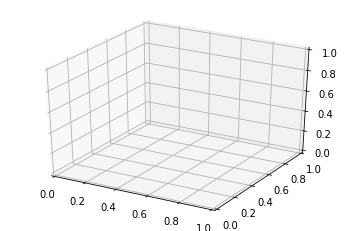

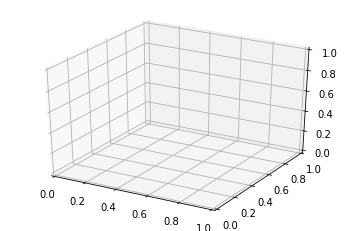

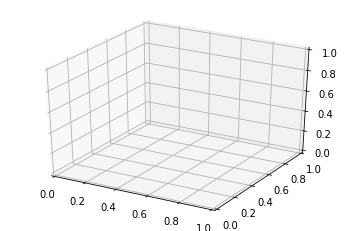

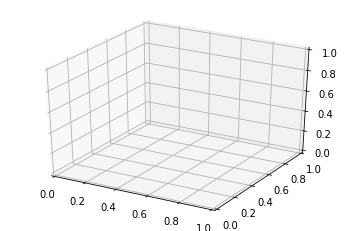

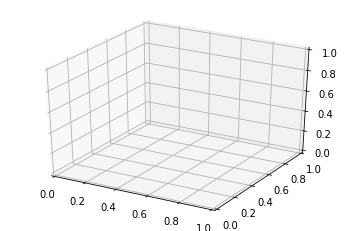

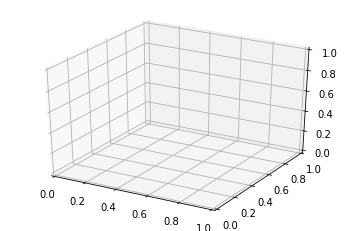

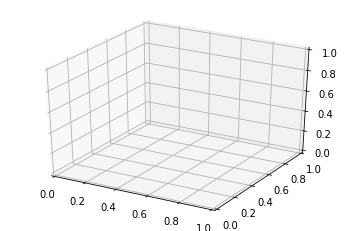

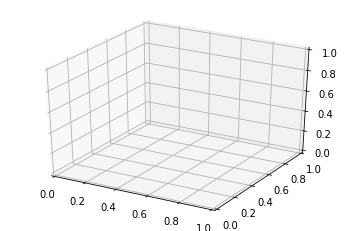

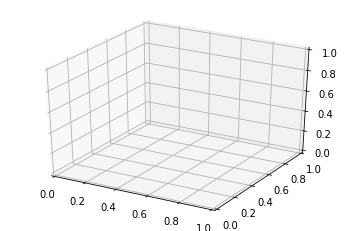

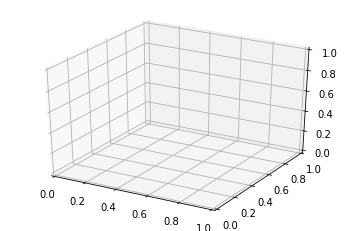

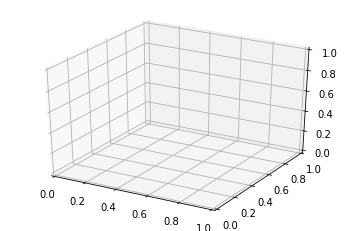

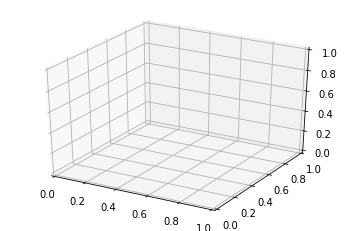

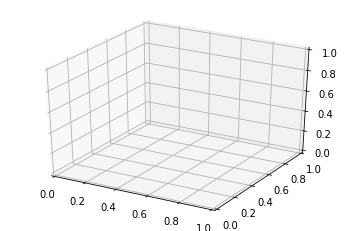

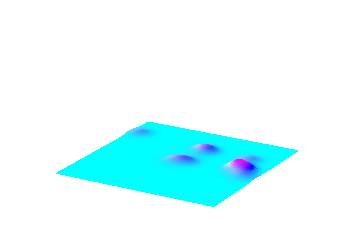

In [128]:
def main():
    v0 = 2.5  # velocity
    eta = 1  # random fluctuation in angle (in radians)
    L = 10  # size of box
    R = 1  # interaction radius
    dt = 0.2  # time step
    Nt = 124  # number of time steps
    N = 10  # number of birds


    # Initialize
    np.random.seed(17)  # set the random number generator seed

    # bird positions
    x = np.random.rand(N, 1) * L
    y = np.random.rand(N, 1) * L

    # bird velocities
    theta = 2 * np.pi * np.random.rand(N, 1)
    vx = v0 * np.cos(theta)
    vy = v0 * np.sin(theta)

    images_list = []

    # Simulation Main Loop
    for i in range(Nt):

        print("%d/%d" %(i,Nt))

        # move
        x += vx * dt
        y += vy * dt

        # apply periodic BCs
        x = x % L
        y = y % L

        # find mean angle of neighbors within R
        mean_theta = theta
        for b in range(N):
            neighbors = (x - x[b]) ** 2 + (y - y[b]) ** 2 < R ** 2
            sx = np.sum(np.cos(theta[neighbors]))
            sy = np.sum(np.sin(theta[neighbors]))
            mean_theta[b] = np.arctan2(sy, sx)

        # add random perturbations
        theta = mean_theta + eta * (np.random.rand(N, 1) - 0.5)

        # update velocities
        vx = v0 * np.cos(theta)
        vy = v0 * np.sin(theta)

        # plot in real time
        if True or (i == Nt - 1):
            plt.cla()

            xx, yy = np.mgrid[0:L:100j, 0:L:100j]
            xx_yy = np.column_stack([xx.flat, yy.flat])

            z = np.zeros(xx_yy.shape[0], )

            for point_sel in range(N):
                z += 0.5*multivariate_normal.pdf(xx_yy, mean=np.array([x[point_sel].item(), y[point_sel].item()]), cov=np.array([[0.25, 0.], [0., 0.25]]))
            z = z.reshape(xx.shape)
            
            if beat_array[i]>1:
                z = z*beat_array[i]
            elif beat_array[i+1]>1 :
                z=z*1.1
            else:
                z = z*beat_array[i]
                
            fig = plt.figure()
            ax = fig.gca(projection='3d')
            ls = LightSource(azdeg=0, altdeg=65)
            rgb = ls.shade(z, plt.cm.cool)
            ax.set_axis_off()
            ax.set_zlim3d(0, 2)
            _ = ax.plot_surface(xx, yy, z, rstride=1, cstride=1, linewidth=0,antialiased=False, facecolors=rgb, cmap='winter')

            ax.set(xlim=(0, L), ylim=(0, L))

            canvas = FigureCanvas(fig)
            canvas.draw()
            image = np.fromstring(canvas.tostring_rgb(), dtype='uint8')
            image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

            images_list.append(image)

    clip = mpy.ImageSequenceClip(images_list, fps=25)
    clip.write_videofile('video.mp4', codec='libx264')
    audio_background = mpy.AudioFileClip('FNF_ost.wav')
    final_clip = clip.set_audio(audio_background)
    final_clip.write_videofile('FNF_video.mp4',  codec="libx264")

    return 0


if __name__ == "__main__":
        main()